# LINEAR REGRESSION YIELD ~ PARAMS

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import statsmodels.formula.api as sm
import copy
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import sklearn
from math import sqrt
from functools import reduce
import numpy as np
#import ee
#import geemap
import geopandas as gpd
import rioxarray as rxr
import rasterstats as rs
from rasterio.plot import show
import rasterio
import cartopy.crs as ccrs
import gdal
%matplotlib inline
plt.rcParams["font.family"] = "Arial"

# IRRIGATED

In [222]:
# NDVI SUM Data
points ='/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/pts_seasonalCompositeNDVI_2001-2018_SUM_JAS.gpkg'
points = gpd.read_file(points)
points = points.groupby(['Class','ADM3_EN']).mean().reset_index()
points = points.loc[points['Class']=='Irrigated Rice']
points = points.rename(columns=dict(zip(list(points.columns[2:20]), list(np.arange(2001, 2019, 1)))))
points['param']='ndvi'
ndvi = points.melt(id_vars=["Class", "ADM3_EN", "param"], var_name="Date", value_name='value')

# PCP
param_name = 'pcp'
params = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/params_seasonalComposite_'+param_name+'_JAS.gpkg'
params = gpd.read_file(params).groupby(['Class','ADM3_EN']).mean().reset_index()
params = params.loc[params['Class']=='Irrigated Rice']
params = params.rename(columns=dict(zip(list(params.columns[2:20]), list(np.arange(2001, 2019, 1)))))
params['param']= param_name
pcp = params.melt(id_vars=["Class", "ADM3_EN", "param"], var_name="Date", value_name='value')

# LST DAY
param_name = 'LST_Day_1km'
params = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/params_seasonalComposite_'+param_name+'_JAS.gpkg'
params = gpd.read_file(params).groupby(['Class','ADM3_EN']).mean().reset_index()
params = params.loc[params['Class']=='Irrigated Rice']
params = params.rename(columns=dict(zip(list(params.columns[2:20]), list(np.arange(2001, 2019, 1)))))
params['param']= param_name
lstday = params.melt(id_vars=["Class", "ADM3_EN", "param"], var_name="Date", value_name='value')

# LST NIGHT
param_name = 'LST_Night_1km'
params = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/params_seasonalComposite_'+param_name+'_JAS.gpkg'
params = gpd.read_file(params).groupby(['Class','ADM3_EN']).mean().reset_index()
params = params.loc[params['Class']=='Irrigated Rice']
params = params.rename(columns=dict(zip(list(params.columns[2:20]), list(np.arange(2001, 2019, 1)))))
params['param']= param_name
lstnight = params.melt(id_vars=["Class", "ADM3_EN", "param"], var_name="Date", value_name='value')

# ET
param_name = 'et'
params = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/params_seasonalComposite_'+param_name+'_JAS.gpkg'
params = gpd.read_file(params).groupby(['Class','ADM3_EN']).mean().reset_index()
params = params.loc[params['Class']=='Irrigated Rice']
params = params.rename(columns=dict(zip(list(params.columns[2:20]), list(np.arange(2001, 2019, 1)))))
params['param']= param_name
et = params.melt(id_vars=["Class", "ADM3_EN", "param"], var_name="Date", value_name='value')

# PET
param_name = 'pet'
params = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/params_seasonalComposite_'+param_name+'_JAS.gpkg'
params = gpd.read_file(params).groupby(['Class','ADM3_EN']).mean().reset_index()
params = params.loc[params['Class']=='Irrigated Rice']
params = params.rename(columns=dict(zip(list(params.columns[2:20]), list(np.arange(2001, 2019, 1)))))
params['param']= param_name
pet = params.melt(id_vars=["Class", "ADM3_EN", "param"], var_name="Date", value_name='value')

# ELEVATION
param_name = 'elevation'
params = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/params_ch3_elevation.gpkg'
params = gpd.read_file(params).groupby(['Class','ADM3_EN']).mean().reset_index()
params = params.loc[params['Class']=='Irrigated Rice']
params = params.rename(columns=dict(zip(list(params.columns[2:20]), list(np.arange(2001, 2019, 1)))))
params['param']= param_name
elevation = params.melt(id_vars=["Class", "ADM3_EN", "param"], var_name="Date", value_name='value')
elevation['Date'] = 2017

# SLOPE
param_name = 'slope'
params = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/params_ch3_slope.gpkg'
params = gpd.read_file(params).groupby(['Class','ADM3_EN']).mean().reset_index()
params = params.loc[params['Class']=='Irrigated Rice']
params = params.rename(columns=dict(zip(list(params.columns[2:20]), list(np.arange(2001, 2019, 1)))))
params['param']= param_name
slope = params.melt(id_vars=["Class", "ADM3_EN", "param"], var_name="Date", value_name='value')
slope['Date'] = 2017


In [223]:
startYear = 2012
endYear = 2017
actual = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
actual = actual[(actual.param == 'yield') & (actual.ecosystem == 'irri')].reset_index(drop=True)
actualFixed = actual.rename(columns={'muni':'ADM3_EN','year':'Date'}).drop(columns=['ecosystem'])


In [224]:
merged = pd.concat([ndvi, pcp, lstday, lstnight, et, pet, elevation, slope, actualFixed]).drop(columns='Class')
subbed = merged[(merged.Date <= endYear) & (merged.Date >= startYear)].groupby(['ADM3_EN','param']).mean().reset_index(drop=False)


In [225]:
df = subbed.pivot(index='ADM3_EN',columns='param',values='value').dropna().reset_index(drop=False).rename(columns={'yield':'actualYield'})
df

param,ADM3_EN,LST_Day_1km,LST_Night_1km,elevation,et,ndvi,pcp,pet,slope,actualYield
0,Anilao,29.752275,22.879352,25.000000,24.428704,2.161667,1021.584401,35.135185,0.679341,4.077162
1,Banate,29.167690,23.270684,9.000000,25.580741,2.214025,897.541770,37.108333,0.464795,4.105603
2,Barotac Nuevo,30.485585,23.150976,14.500000,25.610251,2.323344,1009.738954,36.803858,0.429941,4.260785
3,Barotac Viejo,30.307110,23.119553,21.476190,24.637728,2.184279,907.282328,36.262727,0.973596,3.986644
4,Dingle,30.343313,22.812495,23.000000,26.404654,2.259961,1042.818827,36.141766,0.656537,4.529855
5,Dumangas,30.073989,23.647222,7.947368,27.070961,2.309406,1017.942077,37.917145,0.336499,4.271341
6,Iloilo City,30.940884,23.578897,9.833333,22.376042,2.197569,1154.839328,32.598457,0.280021,4.198182
7,Janiuay,30.734093,22.720741,44.000000,26.976389,2.278850,1069.234975,34.770833,0.000000,4.046125
8,Leganes,30.171614,23.332358,11.384615,26.634028,2.290865,1106.655612,37.770274,0.235064,4.404402
9,Mina,30.530469,23.080012,32.666667,28.689950,2.348275,1066.056944,38.955594,0.405078,4.631615


In [233]:
#formula = 'actualYield ~ ndvi + LST_Night_1km + pcp + et + pet + slope + elevation'
formula = 'actualYield ~ ndvi + slope + pcp + LST_Day_1km + 1'
results = sm.ols(formula = formula, 
                 missing='drop',
                 data=df).fit()
print(results.summary())
print(pd.DataFrame(results.params).round(decimals=4).transpose())


                            OLS Regression Results                            
Dep. Variable:            actualYield   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     8.856
Date:                Tue, 01 Feb 2022   Prob (F-statistic):            0.00112
Time:                        00:03:29   Log-Likelihood:                 8.6631
No. Observations:                  18   AIC:                            -7.326
Df Residuals:                      13   BIC:                            -2.874
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.1038      2.906     -0.724      

/Users/delatorredm/miniconda3/envs/ee/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [227]:
import statsmodels.formula.api as smf


def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

model = forward_selected(df.drop(columns='ADM3_EN'), 'actualYield')
model.model.formula
#model.rsquared

'actualYield ~ ndvi + slope + pcp + LST_Day_1km + 1'

In [190]:
model.summary()

/Users/delatorredm/miniconda3/envs/ee/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            actualYield   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     8.856
Date:                Mon, 31 Jan 2022   Prob (F-statistic):            0.00112
Time:                        20:05:52   Log-Likelihood:                 8.6631
No. Observations:                  18   AIC:                            -7.326
Df Residuals:                      13   BIC:                            -2.874
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.1038      2.906     -0.724      0.482      -8.381       4.173
ndvi            4.0309      0.745      5.410      0.000       2.421       5.640
slope           0.3998      0.201      1.992      0.068      -0.034       0.833
pcp             0.0012      0.001      2.302      0.039    7.07e-05       0.002
LST_Day_1km    -0.1362      0.102     -1.337      0.204      -0.356       0.084
==============================================================================
Omnibus:                        0.083   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.959   Jarque-Bera (JB):                0.309
Skew:                           0.044   Prob(JB):                        0.857
Kurtosis:                       2.364   Cond. No.                     7.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Feature: 0, Score: 0.01510
Feature: 1, Score: 0.05448
Feature: 2, Score: 0.05250
Feature: 3, Score: 0.14164
Feature: 4, Score: 0.50346
Feature: 5, Score: 0.03097
Feature: 6, Score: 0.14752
Feature: 7, Score: 0.05434


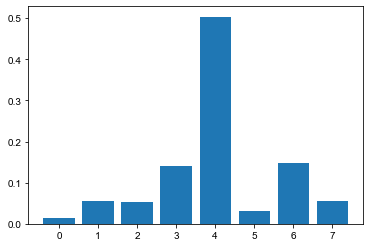

param,LST_Day_1km,LST_Night_1km,elevation,et,ndvi,pcp,pet,slope
0,29.752275,22.879352,25.000000,24.428704,2.161667,1021.584401,35.135185,0.679341
1,29.167690,23.270684,9.000000,25.580741,2.214025,897.541770,37.108333,0.464795
2,30.485585,23.150976,14.500000,25.610251,2.323344,1009.738954,36.803858,0.429941
3,30.307110,23.119553,21.476190,24.637728,2.184279,907.282328,36.262727,0.973596
4,30.343313,22.812495,23.000000,26.404654,2.259961,1042.818827,36.141766,0.656537
5,30.073989,23.647222,7.947368,27.070961,2.309406,1017.942077,37.917145,0.336499
6,30.940884,23.578897,9.833333,22.376042,2.197569,1154.839328,32.598457,0.280021
7,30.734093,22.720741,44.000000,26.976389,2.278850,1069.234975,34.770833,0.000000
8,30.171614,23.332358,11.384615,26.634028,2.290865,1106.655612,37.770274,0.235064
9,30.530469,23.080012,32.666667,28.689950,2.348275,1066.056944,38.955594,0.405078


In [194]:

# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
y = df['actualYield'].reset_index(drop=True).to_numpy()
X = df.drop(columns=['actualYield','ADM3_EN']).reset_index(drop=True).to_numpy()
# define the model
model = RandomForestRegressor(random_state=0)
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
df.drop(columns=['actualYield','ADM3_EN']).reset_index(drop=True)


# RAINFED

In [208]:
# NDVI SUM Data
points ='/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/pts_seasonalCompositeNDVI_2001-2018_SUM_JFM.gpkg'
points = gpd.read_file(points)
points = points.groupby(['Class','ADM3_EN']).mean().reset_index()
points = points.loc[points['Class']=='Rain-fed Rice']
points = points.rename(columns=dict(zip(list(points.columns[2:20]), list(np.arange(2001, 2019, 1)))))
points['param']='ndvi'
ndvi = points.melt(id_vars=["Class", "ADM3_EN", "param"], var_name="Date", value_name='value')

# PCP
param_name = 'pcp'
params = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/params_seasonalComposite_'+param_name+'_JFM.gpkg'
params = gpd.read_file(params).groupby(['Class','ADM3_EN']).mean().reset_index()
params = params.loc[params['Class']=='Rain-fed Rice']
params = params.rename(columns=dict(zip(list(params.columns[2:20]), list(np.arange(2001, 2019, 1)))))
params['param']= param_name
pcp = params.melt(id_vars=["Class", "ADM3_EN", "param"], var_name="Date", value_name='value')

# LST DAY
param_name = 'LST_Day_1km'
params = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/params_seasonalComposite_'+param_name+'_JFM.gpkg'
params = gpd.read_file(params).groupby(['Class','ADM3_EN']).mean().reset_index()
params = params.loc[params['Class']=='Rain-fed Rice']
params = params.rename(columns=dict(zip(list(params.columns[2:20]), list(np.arange(2001, 2019, 1)))))
params['param']= param_name
lstday = params.melt(id_vars=["Class", "ADM3_EN", "param"], var_name="Date", value_name='value')

# LST NIGHT
param_name = 'LST_Night_1km'
params = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/params_seasonalComposite_'+param_name+'_JFM.gpkg'
params = gpd.read_file(params).groupby(['Class','ADM3_EN']).mean().reset_index()
params = params.loc[params['Class']=='Rain-fed Rice']
params = params.rename(columns=dict(zip(list(params.columns[2:20]), list(np.arange(2001, 2019, 1)))))
params['param']= param_name
lstnight = params.melt(id_vars=["Class", "ADM3_EN", "param"], var_name="Date", value_name='value')

# ET
param_name = 'et'
params = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/params_seasonalComposite_'+param_name+'_JFM.gpkg'
params = gpd.read_file(params).groupby(['Class','ADM3_EN']).mean().reset_index()
params = params.loc[params['Class']=='Rain-fed Rice']
params = params.rename(columns=dict(zip(list(params.columns[2:20]), list(np.arange(2001, 2019, 1)))))
params['param']= param_name
et = params.melt(id_vars=["Class", "ADM3_EN", "param"], var_name="Date", value_name='value')

# PET
param_name = 'pet'
params = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/params_seasonalComposite_'+param_name+'_JFM.gpkg'
params = gpd.read_file(params).groupby(['Class','ADM3_EN']).mean().reset_index()
params = params.loc[params['Class']=='Rain-fed Rice']
params = params.rename(columns=dict(zip(list(params.columns[2:20]), list(np.arange(2001, 2019, 1)))))
params['param']= param_name
pet = params.melt(id_vars=["Class", "ADM3_EN", "param"], var_name="Date", value_name='value')

# ELEVATION
param_name = 'elevation'
params = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/params_ch3_elevation.gpkg'
params = gpd.read_file(params).groupby(['Class','ADM3_EN']).mean().reset_index()
params = params.loc[params['Class']=='Rain-fed Rice']
params = params.rename(columns=dict(zip(list(params.columns[2:20]), list(np.arange(2001, 2019, 1)))))
params['param']= param_name
elevation = params.melt(id_vars=["Class", "ADM3_EN", "param"], var_name="Date", value_name='value')
elevation['Date'] = 2017

# SLOPE
param_name = 'slope'
params = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/params_ch3_slope.gpkg'
params = gpd.read_file(params).groupby(['Class','ADM3_EN']).mean().reset_index()
params = params.loc[params['Class']=='Rain-fed Rice']
params = params.rename(columns=dict(zip(list(params.columns[2:20]), list(np.arange(2001, 2019, 1)))))
params['param']= param_name
slope = params.melt(id_vars=["Class", "ADM3_EN", "param"], var_name="Date", value_name='value')
slope['Date'] = 2017


In [209]:
startYear = 2012
endYear = 2017
actual = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
actual = actual[(actual.param == 'yield') & (actual.ecosystem == 'rf')].reset_index(drop=True)
actualFixed = actual.rename(columns={'muni':'ADM3_EN','year':'Date'}).drop(columns=['ecosystem'])


In [210]:
merged = pd.concat([ndvi, pcp, lstday, lstnight, et, pet, elevation, slope, actualFixed]).drop(columns='Class')
subbed = merged[(merged.Date <= endYear) & (merged.Date >= startYear)].groupby(['ADM3_EN','param']).mean().reset_index(drop=False)


In [213]:
df = subbed.pivot(index='ADM3_EN',columns='param',values='value').dropna().reset_index(drop=False).rename(columns={'yield':'actualYield'})
'''df = df.loc[df['ADM3_EN'].isin([
#'Carles',
'Lambunao',
#'Calinog',
'Duenas',
'Estancia',
'Sta Barbara',
'Maasin',
'Cabatuan',
#'Leon',
'Bingawan',
'Passi City',
#'Badiangan',
#'San Dionisio',
#'Balasan',
'Alimodian',
#'Guimbal',
#'New Lucena',
'Igbaras',
#'Tubungan',
'Janiuay',
#'San Enrique',
'Iloilo City',
#'Batad'

])]'''


"df = df.loc[df['ADM3_EN'].isin([\n#'Carles',\n'Lambunao',\n#'Calinog',\n'Duenas',\n'Estancia',\n'Sta Barbara',\n'Maasin',\n'Cabatuan',\n#'Leon',\n'Bingawan',\n'Passi City',\n#'Badiangan',\n#'San Dionisio',\n#'Balasan',\n'Alimodian',\n#'Guimbal',\n#'New Lucena',\n'Igbaras',\n#'Tubungan',\n'Janiuay',\n#'San Enrique',\n'Iloilo City',\n#'Batad'\n\n])]"

In [214]:
#formula = 'actualYield ~ ndvi + LST_Day_1km + LST_Night_1km + pcp + et + pet + slope + elevation'
formula = 'actualYield ~ LST_Night_1km'
results = sm.ols(formula = formula, 
                 missing='drop',
                 data=df).fit()
print(results.summary())
print(pd.DataFrame(results.params).round(decimals=4).transpose())


                            OLS Regression Results                            
Dep. Variable:            actualYield   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.6208
Date:                Mon, 31 Jan 2022   Prob (F-statistic):              0.435
Time:                        23:40:47   Log-Likelihood:                -14.883
No. Observations:                  42   AIC:                             33.77
Df Residuals:                      40   BIC:                             37.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.3067      2.352      2.256

In [150]:
df.drop(columns=['actualYield','ADM3_EN']).reset_index(drop=True)

param,LST_Day_1km,LST_Night_1km,elevation,et,ndvi,pcp,pet,slope
0,30.453222,21.905168,161.947368,26.341044,2.076395,245.505945,50.085343,4.135536
1,28.852831,21.123917,87.166667,26.819907,2.260217,336.040811,48.003781,1.189152
2,31.225285,22.046221,68.000000,23.445798,1.993260,268.548848,46.958031,1.439763
3,29.299636,22.095549,21.600000,27.475556,2.078937,389.250603,49.207801,1.956394
4,31.414705,22.372548,251.823529,27.466449,2.030468,189.648924,53.204276,7.835081
5,30.284323,21.502530,94.277778,24.604876,2.091138,287.680496,46.941510,1.460164
6,29.144031,21.043163,110.000000,28.557409,2.244729,286.183144,48.262637,2.003423
7,29.206931,21.475431,187.636364,28.800421,2.249645,283.572138,50.547731,4.949307


Feature: 0, Score: 0.04145
Feature: 1, Score: 0.07695
Feature: 2, Score: 0.06545
Feature: 3, Score: 0.27625
Feature: 4, Score: 0.13560
Feature: 5, Score: 0.08037
Feature: 6, Score: 0.13881
Feature: 7, Score: 0.18514


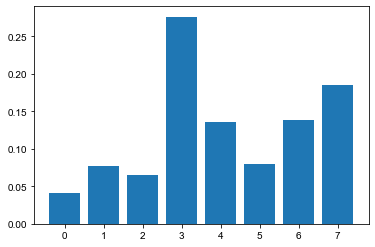

array([[2.86873201e+01, 2.13841919e+01, 7.08857143e+01, 2.99413650e+01,
        2.13171334e+00, 3.23840146e+02, 4.99472643e+01, 2.30845688e+00],
       [3.04532218e+01, 2.19051679e+01, 1.61947368e+02, 2.63410440e+01,
        2.07639474e+00, 2.45505945e+02, 5.00853430e+01, 4.13553620e+00],
       [3.20980783e+01, 2.17491426e+01, 4.69411765e+01, 2.39607435e+01,
        1.98801078e+00, 2.36849850e+02, 4.73216980e+01, 2.53554096e+00],
       [2.93367029e+01, 2.15512249e+01, 7.13571429e+01, 2.78942461e+01,
        2.27357977e+00, 2.82728989e+02, 4.85560020e+01, 1.67629062e+00],
       [2.95610980e+01, 2.17540474e+01, 2.17777778e+01, 2.78473736e+01,
        2.01251975e+00, 4.29465698e+02, 4.99163195e+01, 2.00132692e+00],
       [3.15125641e+01, 2.18824811e+01, 3.43529412e+01, 2.36922930e+01,
        1.97395098e+00, 2.16948468e+02, 4.67912855e+01, 1.54454366e+00],
       [3.17496424e+01, 2.17775036e+01, 7.96000000e+00, 2.40270061e+01,
        1.86961800e+00, 2.63146109e+02, 4.87640321e+01, 3.

In [215]:

# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
y = df['actualYield'].reset_index(drop=True).to_numpy()
X = df.drop(columns=['actualYield','ADM3_EN']).reset_index(drop=True).to_numpy()
# define the model
model = RandomForestRegressor(random_state=0)
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
X


In [216]:
#formula = 'actualYield ~ ndvi + LST_Night_1km + pcp + et + pet + slope + elevation'
formula = 'actualYield ~ ndvi + LST_Night_1km + pcp + et + pet + slope + elevation'
results = sm.ols(formula = formula, 
                 missing='drop',
                 data=df).fit()
print(results.summary())
print(pd.DataFrame(results.params).round(decimals=4).transpose())


                            OLS Regression Results                            
Dep. Variable:            actualYield   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     4.750
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           0.000836
Time:                        23:40:59   Log-Likelihood:               -0.88372
No. Observations:                  42   AIC:                             17.77
Df Residuals:                      34   BIC:                             31.67
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.2401      3.967      1.321

In [219]:
import statsmodels.formula.api as smf


def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

model = forward_selected(df.drop(columns='ADM3_EN'), 'actualYield')
model.model.formula
#model.rsquared

'actualYield ~ pet + et + ndvi + elevation + LST_Day_1km + pcp + 1'

In [220]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            actualYield   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     6.486
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           0.000115
Time:                        23:41:19   Log-Likelihood:                0.49335
No. Observations:                  42   AIC:                             13.01
Df Residuals:                      35   BIC:                             25.18
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.9739      4.111      2.183      0.036       0.628      17.320
pet             0.0170      0.051      0.335      0.740      -0.086       0.120
et             -0.1493      0.053     -2.792      0.008      -0.258      -0.041
ndvi            1.3861      0.692      2.003      0.053      -0.019       2.791
elevation      -0.0017      0.001     -1.901      0.066      -0.003       0.000
LST_Day_1km    -0.1567      0.092     -1.698      0.098      -0.344       0.031
pcp            -0.0015      0.001     -1.219      0.231      -0.004       0.001
==============================================================================
Omnibus:                        1.961   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.375   Jarque-Bera (JB):                1.157
Skew:                          -0.382   Prob(JB):                        0.561
Kurtosis:                       3.276   Cond. No.                     3.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""